In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [12]:
df.species.value_counts('normalize')

species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: proportion, dtype: float64

In [13]:
ps = []

for i in range(1000):
    count = 0
    for i in range(100):
        if df.species.sample(1).values[0] == 'Chinstrap':
            count += 1
    p = count / 100
    ps.append(p)
ps = np.array(ps)
p = round(np.average(ps), 3)
print(f"p = {p}")

p = 0.197


Wahrscheinlichkeit --> p(A) = π = 0,197

Formel --> P(X=x) = (1 - π)^x-1 * π

In [29]:
P_Xs = []
F_Xs = []
for i in range(1, 16):
    P_X = ((1 - p) ** (i - 1)) * p
    P_Xs.append(round(P_X, 2))

    F_X = 1 - (1 - p) ** (i)
    F_Xs.append(round(F_X, 2))

for i, P_X in enumerate(P_Xs, 1):
    print(f"P(X={i}) = {P_X}")

P(X=1) = 0.2
P(X=2) = 0.16
P(X=3) = 0.13
P(X=4) = 0.1
P(X=5) = 0.08
P(X=6) = 0.07
P(X=7) = 0.05
P(X=8) = 0.04
P(X=9) = 0.03
P(X=10) = 0.03
P(X=11) = 0.02
P(X=12) = 0.02
P(X=13) = 0.01
P(X=14) = 0.01
P(X=15) = 0.01


Verteilungsfunktion --> F(X) = P(X≤x) = 1 - (1 - π)^x

In [30]:
for i, F_X in enumerate(F_Xs, 1):
    print(f"F(X<={i}) = {F_X}")

F(X<=1) = 0.2
F(X<=2) = 0.36
F(X<=3) = 0.48
F(X<=4) = 0.58
F(X<=5) = 0.67
F(X<=6) = 0.73
F(X<=7) = 0.78
F(X<=8) = 0.83
F(X<=9) = 0.86
F(X<=10) = 0.89
F(X<=11) = 0.91
F(X<=12) = 0.93
F(X<=13) = 0.94
F(X<=14) = 0.95
F(X<=15) = 0.96


Erwartungswert --> E(X) = 1 / p

In [18]:
E_X = round(1 / p, 2)
print(f"E(X) = {E_X}")

E(X) = 5.08


Median --> x = F(X) ≥ 0,5 für kleinste x

In [19]:
for F in F_Xs:
    if F >= 0.5:
        median = F_Xs.index(F) + 1
        break
print(f"Median = {median}")

Median = 4


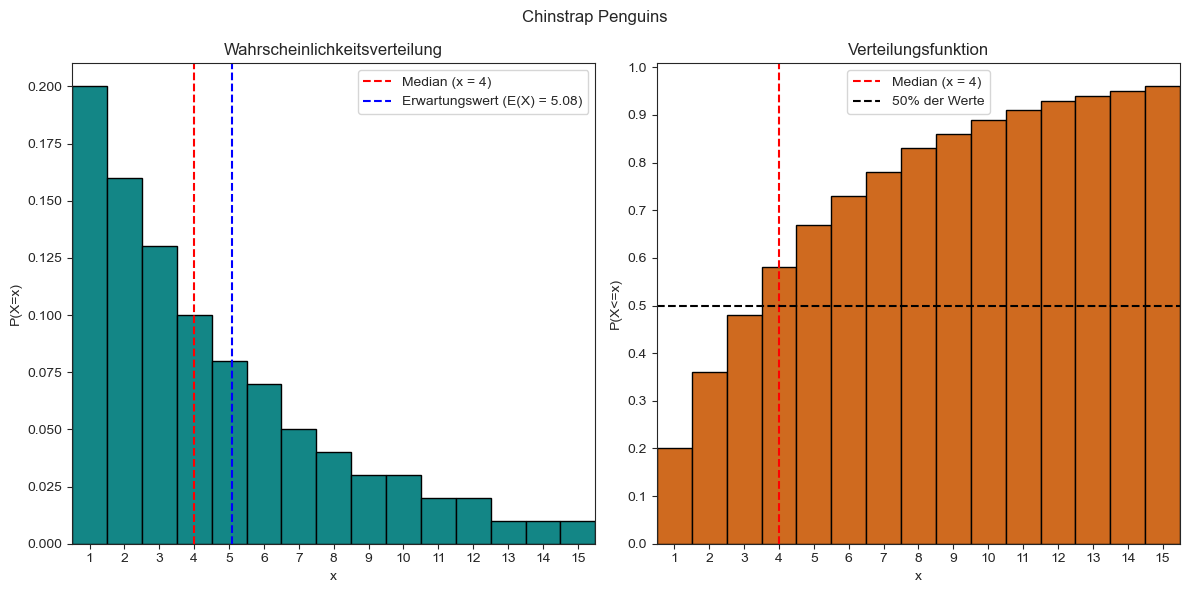

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.set_style('ticks')
sns.barplot(x=np.arange(1, 16), y=P_Xs, ax=ax[0], color='#009999', edgecolor='black', width=1.0)
sns.barplot(x=np.arange(1, 16), y=F_Xs, ax=ax[1], color='#EC6602', edgecolor='black', width=1.0)
ax[0].set_title('Wahrscheinlichkeitsverteilung')
ax[1].set_title('Verteilungsfunktion')
ax[0].set_xlabel('x')
ax[0].set_ylabel('P(X=x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('P(X<=x)')
ax[0].axvline(x=median - 1, color='r', linestyle='--', label=f'Median (x = {median})')
ax[0].axvline(x=E_X - 1, color='b', linestyle='--', label=f'Erwartungswert (E(X) = {E_X})')
ax[1].axvline(x=median - 1, color='r', linestyle='--', label=f'Median (x = {median})')
ax[1].axhline(y=0.5, color='black', linestyle='--', label=f'50% der Werte')
ax[0].legend()
ax[1].legend()
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
fig.suptitle('Chinstrap Penguins')
plt.tight_layout()
plt.show();

In [20]:
chinstrap_occ = []
position = 0
i = 0
while i < 100:
    position += 1
    if df.species.sample(1).values[0] == 'Chinstrap':
        chinstrap_occ.append(position)
        position = 0
        i += 1
chinstrap_occ = np.array(chinstrap_occ)
avg = round(np.average(chinstrap_occ), 2)
print(f"Mittelwert = {avg}")

Mittelwert = 4.86
